<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/RNC_Carrerteras_federales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carrerteras Federales

Elaborado con los datos del portal del INEGI: [Red Nacional de Caminios 2023](https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/caminos/2023/794551067307_s.zip)

In [1]:
!pip install geopandas pandas matplotlib

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
red_vial = gpd.read_file('/content/drive/MyDrive/Red_Nacional_de_Caminos2023/conjunto_de_datos/red_vial.shp')
red_vial.head()

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
0,1,Periférico,Canal de Garay,N/A,N/A,N/A,3,Habilitado,En operación,0,...,Un sentido,1,80,1485192,1485193,379.148800,10.5,2022-05-27 21:12:42,Definida,"LINESTRING (-99.06425 19.33831, -99.06430 19.3..."
1,2,Periférico,Calle 7,N/A,N/A,N/A,2,Habilitado,En operación,0,...,Un sentido,1,50,461201,461207,51.475652,7.0,2022-05-03 19:09:38,Definida,"LINESTRING (-99.05210 19.43041, -99.05191 19.4..."
2,4,Periférico,Boulevard Adolfo López Mateos,N/A,N/A,N/A,2,Habilitado,En operación,0,...,Un sentido,1,50,1485194,1485195,324.396413,8.0,2023-09-04 00:00:00,Definida,"LINESTRING (-99.19358 19.40790, -99.19367 19.4..."
3,5,Calle,Ohio,N/A,N/A,N/A,3,Habilitado,En operación,0,...,Un sentido,2,30,1485196,1485197,142.119662,10.5,2023-07-24 17:50:54,Definida,"LINESTRING (-99.17238 19.39873, -99.17106 19.3..."
4,7,Avenida,Estrella,N/A,N/A,N/A,2,Habilitado,En operación,0,...,Dos sentidos,3,40,1485198,552558,30.483697,7.0,2021-05-14 08:57:35,Definida,"LINESTRING (-99.28566 19.44935, -99.28582 19.4..."


In [ ]:
red_vial.columns

Index(['ID_RED', 'TIPO_VIAL', 'NOMBRE', 'CODIGO', 'COND_PAV', 'RECUBRI',
       'CARRILES', 'ESTATUS', 'CONDICION', 'NIVEL', 'PEAJE', 'ADMINISTRA',
       'JURISDI', 'CIRCULA', 'ESCALA_VIS', 'VELOCIDAD', 'UNION_INI',
       'UNION_FIN', 'LONGITUD', 'ANCHO', 'FECHA_ACT', 'CALIREPR', 'geometry'],
      dtype='object')

In [ ]:
red_vial.shape

(2325970, 23)

## Filtrado por Jurisdiccion federal y Tipo de vialidad Carretera

In [4]:
carreteras_federales = red_vial[ (red_vial['TIPO_VIAL'] == 'Carretera') & (red_vial['ADMINISTRA'] == 'Federal') ]
carreteras_federales.head()

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
31,56,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485241,1485242,185.741033,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27719 19.54568, -99.27717 19.5..."
58,95,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485283,1485284,1321.556725,8.0,2022-05-10 18:44:12,Definida,"LINESTRING (-99.28034 19.53304, -99.28048 19.5..."
93,156,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485333,1485334,702.414829,7.0,2021-04-28 10:28:44,Definida,"LINESTRING (-99.27931 19.44986, -99.27904 19.4..."
125,206,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485373,383916,187.621432,7.0,2021-04-28 11:07:29,Definida,"LINESTRING (-99.25616 19.45917, -99.25583 19.4..."
133,219,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485380,1485241,82.962524,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27736 19.54494, -99.27719 19.5..."


In [7]:
# prompt: descargar el archivo generado

from google.colab import files
carreteras_federales.to_file("carreteras_federales.geojson", driver='GeoJSON')
files.download('carreteras_federales.geojson')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
carreteras_federales.shape

(115586, 23)

In [ ]:
carreteras_federales_simpl = carreteras_federales.drop(['COND_PAV','RECUBRI','ADMINISTRA','JURISDI','ESCALA_VIS','FECHA_ACT','CALIREPR'], axis=1)
carreteras_federales_simpl.head()

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,CARRILES,ESTATUS,CONDICION,NIVEL,PEAJE,CIRCULA,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,geometry
31,56,Carretera,La Venta - Lechería,57,2,Habilitado,En operación,0,Si,Un sentido,80,1485241,1485242,185.741033,8.0,"LINESTRING (-99.27719 19.54568, -99.27717 19.5..."
58,95,Carretera,La Venta - Lechería,57,2,Habilitado,En operación,0,Si,Un sentido,80,1485283,1485284,1321.556725,8.0,"LINESTRING (-99.28034 19.53304, -99.28048 19.5..."
93,156,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Un sentido,60,1485333,1485334,702.414829,7.0,"LINESTRING (-99.27931 19.44986, -99.27904 19.4..."
125,206,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Un sentido,60,1485373,383916,187.621432,7.0,"LINESTRING (-99.25616 19.45917, -99.25583 19.4..."
133,219,Carretera,La Venta - Lechería,57,2,Habilitado,En operación,0,Si,Un sentido,80,1485380,1485241,82.962524,8.0,"LINESTRING (-99.27736 19.54494, -99.27719 19.5..."


In [ ]:
carreteras_federales_simpl.shape

(115586, 16)

In [ ]:
carreteras_federales_simpl[carreteras_federales_simpl['CIRCULA']== 'Dos sentidos']

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,CARRILES,ESTATUS,CONDICION,NIVEL,PEAJE,CIRCULA,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,geometry
4349,7550,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Dos sentidos,60,1488295,1488296,1878.224111,7.0,"LINESTRING (-99.33214 19.43751, -99.33199 19.4..."
4888,8457,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Dos sentidos,40,2516,2517,591.069180,7.0,"LINESTRING (-99.33986 19.44230, -99.34083 19.4..."
4889,8458,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Dos sentidos,40,1488555,2516,1205.570889,7.0,"LINESTRING (-99.33106 19.44036, -99.33137 19.4..."
4890,8459,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Dos sentidos,60,1488136,1488120,488.547271,7.0,"LINESTRING (-99.32171 19.44011, -99.32258 19.4..."
4964,8567,Carretera,Naucalpan - Toluca,134,2,Habilitado,En operación,0,No,Dos sentidos,60,2577,1488578,99.072966,7.0,"LINESTRING (-99.33028 19.43754, -99.33016 19.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325651,3379357,Carretera,Mexicali - Tijuana,2,2,Habilitado,En operación,0,No,Dos sentidos,100,277212,1146071,72.198946,11.0,"LINESTRING (-116.27209 32.51123, -116.27284 32..."
2325755,3379541,Carretera,Guadalajara - Zacatecas,54,4,Habilitado,En operación,0,No,Dos sentidos,100,451615,1146163,28.885525,24.0,"LINESTRING (-102.65608 22.75993, -102.65606 22..."
2325797,3379622,Carretera,Ent. a Presa Hidroeléctrica Zimapán,31,2,Habilitado,En operación,0,No,Dos sentidos,60,1146210,1146209,17.731482,10.0,"LINESTRING (-99.62157 20.70110, -99.62144 20.7..."
2325821,3379654,Carretera,Barranca Larga - Ventanilla,N/D,2,Deshabilitado,En construcción - cerrado,0,Si,Dos sentidos,90,1146234,1021315,172.609133,12.0,"LINESTRING (-96.78826 16.22626, -96.78800 16.2..."


<Axes: >

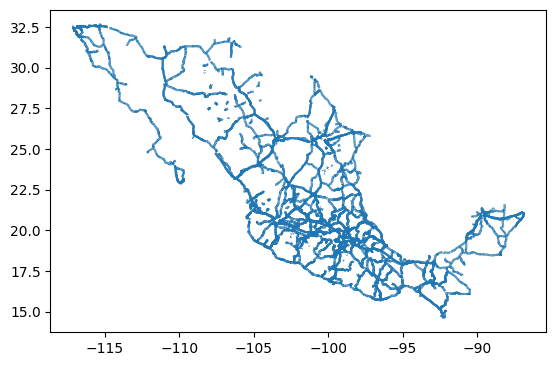

In [ ]:
carreteras_federales.plot()

Agrupacion de los tramos por nombre de la carretera

In [ ]:
carreteras_longitud = carreteras_federales.groupby('NOMBRE').agg({
    'LONGITUD': 'sum',
    })
carreteras_longitud

,LONGITUD
NOMBRE,
4 Caminos - Cercalisa,12159.712585
A Aguascalientes,1855.831441
A Cerro Gordo,10529.921101
A Ent. Maxipista Guadalajara - Tepic,3811.268871
A Guadalajara,853.202075
...,...
Zihuatanejo - La Mira,89773.842717
Zihuatanejo - Playa Azul,21213.824870
Zitácuaro - Ciudad Altamirano,199780.262473


In [ ]:
carreteras_federales

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
31,56,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485241,1485242,185.741033,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27719 19.54568, -99.27717 19.5..."
58,95,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485283,1485284,1321.556725,8.0,2022-05-10 18:44:12,Definida,"LINESTRING (-99.28034 19.53304, -99.28048 19.5..."
93,156,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485333,1485334,702.414829,7.0,2021-04-28 10:28:44,Definida,"LINESTRING (-99.27931 19.44986, -99.27904 19.4..."
125,206,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485373,383916,187.621432,7.0,2021-04-28 11:07:29,Definida,"LINESTRING (-99.25616 19.45917, -99.25583 19.4..."
133,219,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485380,1485241,82.962524,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27736 19.54494, -99.27719 19.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325817,3379648,Carretera,Mérida - Cancún,180,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,90,1146232,1146233,450.857554,9.0,2023-09-14 00:00:00,Definida,"LINESTRING (-88.85715 20.77299, -88.85641 20.7..."
2325818,3379649,Carretera,Mérida - Cancún,180,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,90,1146228,1146230,156.751822,9.0,2023-09-14 00:00:00,Definida,"LINESTRING (-88.85127 20.77279, -88.85149 20.7..."
2325819,3379650,Carretera,Mérida - Cancún,180,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,90,1146233,1146229,161.931556,9.0,2023-09-14 00:00:00,Definida,"LINESTRING (-88.85284 20.77246, -88.85181 20.7..."
2325821,3379654,Carretera,Barranca Larga - Ventanilla,N/D,Con pavimento,Concreto,2,Deshabilitado,En construcción - cerrado,0,...,Dos sentidos,1,90,1146234,1021315,172.609133,12.0,2023-10-18 14:24:40,Aproximada,"LINESTRING (-96.78826 16.22626, -96.78800 16.2..."


In [8]:
descarga = gpd.read_file('/content/carreteras_federales.shp')
descarga.head()

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
0,56,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485241,1485242,185.741033,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27719 19.54568, -99.27717 19.5..."
1,95,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485283,1485284,1321.556725,8.0,2022-05-10 18:44:12,Definida,"LINESTRING (-99.28034 19.53304, -99.28048 19.5..."
2,156,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485333,1485334,702.414829,7.0,2021-04-28 10:28:44,Definida,"LINESTRING (-99.27931 19.44986, -99.27904 19.4..."
3,206,Carretera,Naucalpan - Toluca,134,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1485373,383916,187.621432,7.0,2021-04-28 11:07:29,Definida,"LINESTRING (-99.25616 19.45917, -99.25583 19.4..."
4,219,Carretera,La Venta - Lechería,57,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1485380,1485241,82.962524,8.0,2022-05-09 21:02:45,Definida,"LINESTRING (-99.27736 19.54494, -99.27719 19.5..."


In [9]:
descarga.shape

(115586, 23)